<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## gerald.schuller@tu-ilmenau.de

###**Lecture Video:**

https://youtu.be/8oc00p6kZJQ

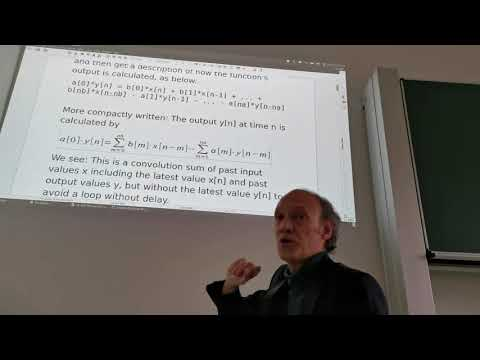

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('8oc00p6kZJQ')

#**Digital Filters**
We saw: For the filtering of the bit and clock components in our transmission we implemented our low pass filter with the function "lfilter". **How does this function work?**

For this we can first have a look at the help-function of "lfilter" in Python. In the terminal window, we type:

    python

    from scipy.signal import *

    help(lfilter)

and then get a description of how the function's output is calculated, as below:

     a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[nb]*x[n-nb] - a[1]*y[n-1] - ... - a[na]*y[n-na] 

More compactly written: The output y[n] at time n is calculated by

$$a[0]⋅y[n]=\sum_{m=0}^{nb}b[m]⋅x[n-m]-\sum_{m-1}^{na}a[m]⋅y[n-m]$$

We see: This is a **convolution sum** of past input values x including the latest value x[n] and past output values y, but without the latest value y[n] to avoid a loop without delay.

Such a filter is a so-called "**Linear Time Invariant System" (LTI System)** because it complies with the following rules:

Lets call $F(x[n])$ as our Filter with input signal $x[n]$, then:

**Linearity**: For 2 signals $x_1[n]$ and $x_2[n]$:

$$f(x_1[n]+x_2[n])=F(x_1[n])+F(x_2[n])$$

For a factor $a$ :

$$F(a⋅x[n])=a⋅F(x[n])$$

This means that we can **"extract" sums and factors** from the function.

**Time Invariance**: When 

$$y[n]=F(x[n])$$

Then applying a shift by $n_0$ :

$$y[n+n_0]=F(x[n+n_0])$$

This means that our function remains the **same regardless of when** we use it.


Our desired low-pass filter should now work like our "mask" in the DFT frequency bands or filter for our image for the sub-sampling (see slide set 4), it should get the signal components at high frequencies as close as possible to zero, i. e. attenuate, but at the same time leave the signal components at the desired low frequencies unchanged.

Our mask or filter in the DFT frequency bands, the transfer function, should therefore ideally have a factor of 1 at the desired frequencies, and a factor of 0 at the unwanted frequencies.

Let's call the **frequency index** of the DFT as $k$ and the **transfer function** of our filter depending on the frequency index as $H(k)$ .

To calculate whether our filter does what it is supposed to do, we have to calculate the DFT of the entire output signal y(n) (or a certain part of it) . For this we treat the signals x and y again as vectors of the desired length (given by the length of the DFT).

The linearity of the DFT helps us here. With the signal vectors $x, y$ and the constant $b$ , we use the **linearity rule**:

$$DFT(x+y)=DFT(x)+DFT(y)$$
$$DFT(b⋅x)=b⋅DFT(x)$$

In our convolution sum also the delayed versions $x(m-n)$ and $y(m-n)$ appear. What is the DFT of it?

For this purpose we look again at the definition of the DFT from slide set 4:

$$X(k)=\sum_{n=0}^{N-1}x(n)⋅e^{\frac{-j⋅2⋅π}{N}⋅n⋅k}$$

for $k=0,...,N-1$ .

In order to simplify this calculation, we will first of all use

$$z=e^{j⋅\frac{2⋅π⋅k}{N}}$$

because this factor is independent of the run index of the sum. 

**Note that** our so defined  contains exactly N uniformly distributed points on the **unit circle** around the origin of the **complex plane**.

**Observe**: The **normalized frequency** is $\frac{2⋅π⋅k}{N}$ , which is now also the **angle of our complex number** $z$!

Since this factor z now also contains the frequency index k, it also appears as a new argument on the left side, and we get the simplified expression:

$$X(z)=\sum_{n=0}^{N-1}x(n)⋅z^{-n}$$

When looking at this expression one can get the idea to use not only the N complex points on the unit circle of the complex plane for $z$, but also arbitrary complex numbers, which simplifies the mathematical analysis and processing. This is indeed done. In the above expression for a signal sequence of length N, this transform is called **z-Transform**. The sum runs over the non-zero part of the signal.

In this transformation we simply use $x(m-n)$ to obtain the z-transform of the delayed signal $X_{delayed}(z)$ . Note that the sum index here is m, and n is assumed to be constant delay. We can adjust the range of the sum to the shifted range of the signal:

\begin{align*}
 X_{delayed}(z) &= \sum_{m=n}^{N-1+n}x(m-n)⋅z^{-m} → Index-Substitution m→m+n \\
      &= \sum_{m=0}^{N-1}x(m)⋅z^{-m-n} \\
      &= z^{-n}⋅\sum_{m=0}^{N-1}x(m)⋅z^{-m} \\
      &= z^{-n}⋅X(z)
\end{align*}

**We see**: The  **z-transform** of the signal shifted or delayed by **n values** is the **z-transform of the undelayed signal multiplied by the factor** $z^{-1}$ !

This is the **delay rule**

Now we have all the necessary "tools" for the closed form calculation of the z-transform and thus the DFT of our filters above. This allows us to calculate the transfer function. The convolution sum of our output was

$$a[0]⋅y[n]=\sum_{m=0}^{nb}b[m]⋅x[n-m]-\sum_{m-1}^{na}a[m]⋅y[n-m]$$

The z-transform of the output is now obtained by using the **linearity rule** and the **delay rule**.

$$a[0]⋅Y(z)=X(z)⋅\sum_{m=0}^{nb}b[m]⋅z^{-m}-Y(z)⋅\sum_{m-1}^{na}a[m]⋅z^{-m}$$

This is now our output in the **z domain**.

To determine our transfer function $H(k)$ or $H(z)$ we need a representation such as

$$Y(z)=H(z)⋅X(z)$$

or

$$H(z)=\frac{Y(z)}{X(z)}$$

So we reshape our equation of output in the z-domain accordingly, first by moving all factors from $Y(z)$ to the left side,

$$Y(z)⋅(a[0]+\sum_{m=1}^{na}a[m]⋅z^{-n})=X(z)⋅\sum_{m=0}^{nb}b[m]⋅z^{-n}$$

Now we can divide both sides by the factors of $Y(z)$ and by $X(z)$ and thus obtain our desired transfer function:

$$H(z)=\frac{Y(z)}{X(z)}=\frac{\sum_{m=0}^{nb}b[m]⋅z^{-m}}{a[0]+\sum_{m=1}^{na}a[m]⋅z^{-m}}$$

**We see**: We obtain a **fraction**, whose **denominator** and **numerator** are **polynomials in z**.

Note that the expressions in numerator and denominator also include the **z-transformed coefficient vectors**

$b=[b[0],...,b[nb]]$ and $a=[a[0],...,a[nb]]$.  If $B(z)$ and $A(z) are the z-transformation of the coefficients vectors, we simply get:

$$H(z)=\frac{B(z)}{A(z)}$$

In order to calculate and plot our frequency response, we need the transfer function depending on the DFT frequency index k, i. e. $H(k)$ . We receive these by our (re)replacement of

$$z=e^{j⋅\frac{2⋅π⋅k}{N}}$$

also

$$H(k)=\frac{\sum_{m=0}^{nb}b[m]⋅e^{-j\frac{2⋅π⋅k⋅m}{N}}}{a[0]+\sum_{m=1}^{na}a[m]⋅e^{j⋅\frac{-2⋅π⋅k⋅m}{N}}}$$



with the frequency index $k=0,...,N-1$.

Analogous to the z-transformation we can rewrite this expression into a fraction from the DFT of the coefficients vectors.  

Their DFT at the frequency index k is $B(k)$  and $A(k)$ . That's what we get with it: Their DFT at the frequency index k is $B(k)$ and $A(k)$ . With that we get:

$$H(k)=\frac{B(k)}{A(k)}$$

We can calculate this for each frequency index k.

This is exactly what our function "**freqz**" in Python's scipy. signal library does. This has a default or standard value of the DFT length of $N=1024$ to calculate 1024 frequency points between the **normalized frequencies** 0 and $2π$ (which corresponds to our sampling frequency).Since the vectors for **a** and **b** are usually shorter, they are simply **filled** up **with zeros** to a length of 1024 to obtain this number of frequency points. By default, only the **lower half** of this range is displayed by this function (i. e. 512 frequency points to half the sampling frequency or Nyquist frequency), because the upper half of our real-value coefficients and signals is symmetrical to it.

#**Python Example**
For our AM demodulator we needed a low pass with the upper cut-off frequency of 500 Hz at 16000 Hz Nyquist frequency.  We calculate our filter coefficients with the function "iirfilter", and we want to check the resulting coefficients.

We start python (this time not ipython) in command line mode in the terminal by typing:

In [1]:
from scipy.signal import *
import numpy as np
import matplotlib.pyplot as plt
[b,a]=iirfilter(2, 500.0/16000,rp=60,btype='lowpass') 
[w,H]=freqz(b,a)

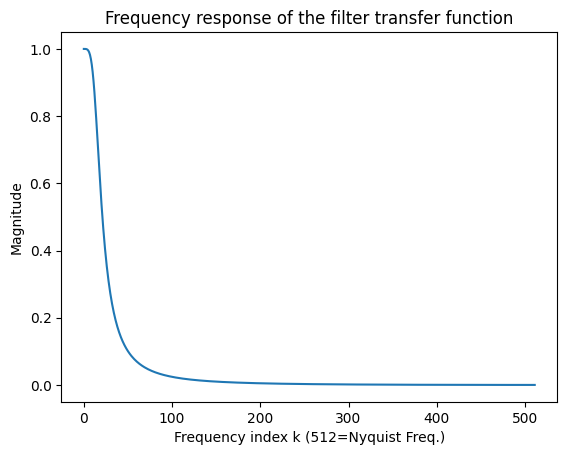

In [2]:
#Plot the frequency response of the 
#transfer function H(k): 
Ha=np.absolute(H) 
plt.plot(Ha)
plt.title('Frequency response of the filter transfer function')
plt.xlabel('Frequency index k (512=Nyquist Freq.)')
plt.ylabel('Magnitude')
plt.show()

This is comparable to what we had seen in the AM example in slide set 8b, except that we see here directly the DFT index k on the x-axis instead of normalizing to pi for the nyquist frequency (and using python instead of ipython).

#**Analysis in z-Domain**
We can now also analyze the behavior of our filter directly in the z-domain. We have a fraction of polynomials there. Let's assume that we have a polynomial of order 2, then:

$$H(z)=\frac{\sum_{m=0}^2b[m]⋅z^{-m}}{\sum_{m=0}^2a[m]⋅z^{-b}}=\frac{z^{-2}\sum_{m=0}^2b[m]⋅z^{2-m}}{z^{-2}\sum_{m=0}^2a[m]⋅z^{2-m}}$$

Polynomials of order N have N zeroes, i. e. here we get 2 zeroes, each in numerator and denominator. The **zeros in the denominator** are also called **poles** or poles of the fraction, because the value of the fraction there goes towards infinity. The zeros of the numerator are simply called zeros of the fraction.

By knowing the zeros and poles we are able to convert the polynomials into a product of first order polynomials. 

Be the two zeros $z_0,z_1$ , and the two poles $p_0,p_1$. 

$$H(z)=\frac{z^{-2}\sum_{m=0}^2b[m]⋅z^{2-n}}{z^{-2}\sum_{m=0}^2a[m]⋅z^{2-m}}=c⋅\frac{(z-z_0)(z-z_1)}{(z-p_0)(z-p_1)}$$

with a constant $c$.

**We see**: We get products and ratios with simple differences $(z-...)$.

Suppose we want to calculate or estimate the **magnitude** of the transfer function $|H(z)|$.

We take

$$|H(z)=|c|⋅\frac{|(z-z_0)||(z-z_1)|}{|(z-p_0)||(z-p_1)|}|$$

We see: Only the **distances** $|(z-...)|$ from z to the **zeros** and **poles** determine the magnitude of the transfer function.


For estimation we will replace $z=e^{j⋅\frac{2⋅π⋅k}{N}}$ again, so that z will go over the unit circle of the complex plane. For instance our Nyquist frequency here is k=N/2, $z=e^{j⋅π}=-1$ or . This means if we see z=-1, this means the Nyquist frequency. Hence making the equivalence between z and the complex exponential means we get this equivalence between the **angle** of z and the **normalized frequency**, $z=e^{j⋅π}$ .

We see: The most significant changes in the frequency response magnitude occur at the closest proximity of z to one of the poles or zero points. In the vicinity of a zero point it will quickly decrease, in the vicinity of a pole point it will quickly increase in magnitude.

In this way, the magnitude of the frequency response can be visually estimated by the position of the poles and zeros in the complex plane.


#**Python Example**
Let's take our example of the low pass filter again, and calculate the poles and zeros with the function "np. roots", which automatically calculates the zeros of a polynomial given as a coefficient vector in the argument:

In [ ]:
from scipy.signal import *
import numpy as np
import matplotlib.pyplot as plt
[b,a]=iirfilter(2, 500.0/16000,rp=60,btype='lowpass') 

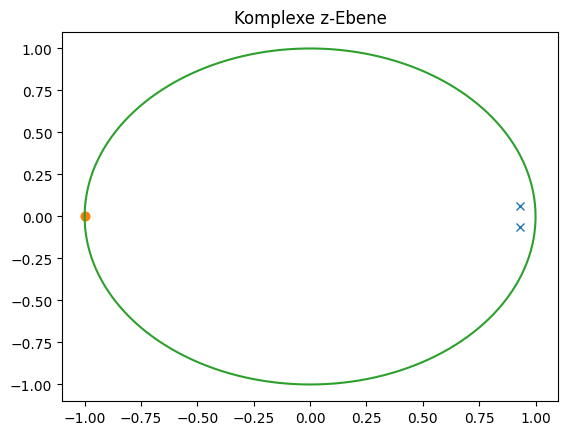

In [ ]:
#Poles and zeros of the filter:
nullstellen=np.roots(b)
nullstellen
#array([-1., -1.])
#This is two zeros locations, each at 
#-1=exp(j*pi), which means normalized 
#frequency pi, or Nyquist frequency. This 
#means we have a double zero at Nyquist 
#frequency and we have no output at the 
#highest frequency, Nyquist.
#The pole locations:
pole=np.roots(a)
pole
#array([ 0.93068057+0.06481626j,  0.93068057-0.06481626j])
#Observe that these are 2 conjugate complex 

#numbers.
#Plot the Poles in the complex plane as 'x':
plt.plot(np.real(pole),np.imag(pole),'x')
#Plot the zeros as 'o':
plt.plot(np.real(nullstellen),np.imag(nullstellen),'o')

#passende Axen-Skalierung:
plt.axis([-1.1,1.1,-1.1,1.1])

#Plot unit circle:
circlere=np.zeros(512)
circleim=np.zeros(512)
for k in range(512):
   circlere[k]=np.cos(2*np.pi/512*k)
   circleim[k]=np.sin(2*np.pi/512*k)

plt.plot(circlere,circleim)
plt.title('Komplexe z-Ebene')
plt.show()


We see the two **poles** as **crosses** and as a thick **dot** the two **zeros** at z=-1. The frequency variable z moves **counterclockwise on the unit circuit** for increasing frequency index k **starting from z=1 (or zero degree)**. The Nyquist frequency, our highest frequency, is reached at z=-1 (or 180 degrees or pi Radiants).

If z is close to the poles, the transfer function reaches its highest values, and its lowest values near the zeros. Since the poles are at the lowest frequencies and the zeroes are at the highest, this confirms once again that it is a low pass filter.

Note: The **poles are within the unit circle**, and thus the **filter is stable** (it does not rise without input). If they are outside the unit circuit, the filter would be unstable! The instability in the Laplace transformation for analog filters corresponds to the poles with positive real parts.

#**Connection to the Laplace Transform:**
The Laplace Transform is made for continuous signals and systems, like in analog circuits. Here you can also have infinite frequencies, because no sampling is involved. Hence the y axis is the imaginary part, which can go to infinity, and the x-axis is the real part, which can also go to infinity.

The z-Transform is for discrete-time signals and systems. There we don’t have infinite frequencies, but the frequencies repeat after normalized frequency 2pi. This is reflected in the unit circle in the z-transform domain: The frequency repeats after angle 2pi!  

#**Python Realtime example**
The following is a Python example, in which the sound from the microphone is processed, using our IIR low pass filter with the upper cutoff frequency of 500 Hz filters, and then outputs it to the speaker in real time:

    python pyrecplay_lpfilterblock.py

We hear: Speech sounds very dull, almost incomprehensible, because the higher frequencies are indeed missing.